In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("arr_big_data.csv")

In [0]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [0]:
df.head()

,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,speed,total_dep_delay,total_arr_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,0,0,0,0,0,0,0,5.50575,51.00000,52.00000,39.80000,27.20000,1033.90000,1010.50000,10.00000,8.60000,0.62000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,6.33161,4.00000,1.00000,62.60000,56.10000,1022.20000,1018.30000,6.90000,3.90000,0.00000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,8.85130,19.00000,-23.00000,36.90000,14.80000,1017.00000,938.90000,10.00000,6.20000,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,5.71154,88.00000,81.00000,50.00000,22.10000,1019.80000,982.40000,10.00000,5.70000,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,4.93151,48.00000,19.00000,26.30000,8.60000,1024.60000,1023.60000,10.00000,6.10000,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Arrival Delay Regression and Result

In [0]:
x = df.drop(['total_arr_delay'], axis = 1) 

In [0]:
y = df["total_arr_delay"]

In [0]:
# Test and Train data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)

In [0]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 142020
Testing Data Count: 35506


In [0]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_arr_delay   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1143.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        04:06:42   Log-Likelihood:            -5.8140e+05
No. Observations:              142020   AIC:                         1.164e+06
Df Residuals:                  141643   BIC:                         1.167e+06
Df Model:                         376                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6312      0.584      7.930      0.000       3.487       5.776
presidents_day           0.4073      0.328      1.243      0.214      -0.235       1.050
easter                   0.0892      0.201      0.445      0.657      -0.304       0.482
memorial_day            -0.0114      0.284     -0.040      0.968      -0.568       0.545
independence_day        -0.2950      0.269     -1.096      0.273      -0.823       0.233
labor_day                0.0862      0.291      0.297      0.767      -0.484       0.656
thanksgiving            -0.5070      0.270     -1.877      0.061      -1.037       0.022
winter_holiday           1.2954      0.269      4.810      0.000       0.768       1.823
speed                   -3.4562      0.034   -102.769      0.000      -3.522      -3.390
total_dep_delay          0.9292      0.002    615.496      0.000       0.926       0.932
temp                     0.0285      0.005      5.781      0.000       0.019       0.038
dew_point_temp          -0.0004      0.001     -0.255      0.799      -0.003       0.002
sea_level_pressure    5.114e-05      0.000      0.176      0.861      -0.001       0.001
station_pressure        -0.0001      0.000     -0.757      0.449      -0.000       0.000
visibilty               -0.1131      0.038     -2.960      0.003      -0.188      -0.038
wind_speed              -0.0018      0.014     -0.129      0.897      -0.029       0.025
prcp                     0.0047      0.032      0.149      0.882      -0.057       0.067
fog                      0.1279      0.179      0.716      0.474      -0.222       0.478
rain_drizzle             0.4384      0.103      4.259      0.000       0.237       0.640
snow_ice_pellets        -0.8804      0.203     -4.344      0.000      -1.278      -0.483
hail                     0.1488      1.026      0.145      0.885      -1.862       2.159
thunder                  0.4750      0.153      3.112      0.002       0.176       0.774
tornado_funnel_cloud    -3.6199      2.803     -1.291      0.197      -9.114       1.874
month_1                 -0.2223      0.144     -1.546      0.122      -0.504       0.060
month_10                 0.3053      0.188      1.627      0.104      -0.062       0.673
month_11                -0.0185      0.167     -0.110      0.912      -0.346       0.309
month_12                -0.1087      0.200     -0.545      0.586      -0.500       0.282
month_2                 -0.5025      0.162     -3.108      0.002      -0.819      -0.186
month_3                  0.4408      0.136      3.250      0.001       0.175       0.707
month_4                  0.9088      0.150      6.049      0.000       0.614       1.203
month_5                  0.8780      0.165      5.311      0.000       0.554       1.202
month_6                  1.0536      0.161      6.535    

In [0]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

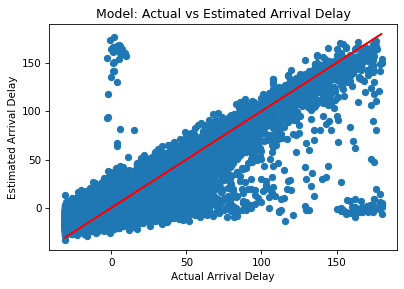

In [0]:
plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Arrival Delay")
plt.ylabel("Estimated Arrival Delay")
plt.title("Model: Actual vs Estimated Arrival Delay")
plt.show()

In [0]:
print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE) : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_preds)))

Mean Absolute Error (MAE)         : 9.105883191903132
Mean Squared Error (MSE) : 213.18788434795334
Root Mean Squared Error (RMSE) : 14.60095491219507


In [0]:
pd.options.display.float_format = '{:.20f}'.format

In [0]:
LR = (results.summary2().tables[1]).astype(float)

In [0]:
LR.columns = ["Coef", "Std_err", "t", "P_value", "0.025", "0.975"]

In [0]:
A = LR.sort_values(['Coef'],ascending=False)
A_5 = A[A.P_value < 0.05].head(5)
B = LR.sort_values(['Coef'],ascending=True)
B_5 = B[B.P_value < 0.05].head(5)
A_Coef = A_5["Coef"]
B_Coef = B_5["Coef"]
AB = pd.concat([A_Coef, B_Coef])
AB = pd.DataFrame(AB)
AB

,Coef
dest_BQN,11.34801
origin_EYW,9.14000
dest_ORD,7.34106
dest_LAX,7.15194
dest_SJU,7.13734
origin_LGA,-14.07088
origin_JFK,-12.65211
origin_CHA,-12.24151
origin_ILM,-11.78687
origin_TYS,-7.80510


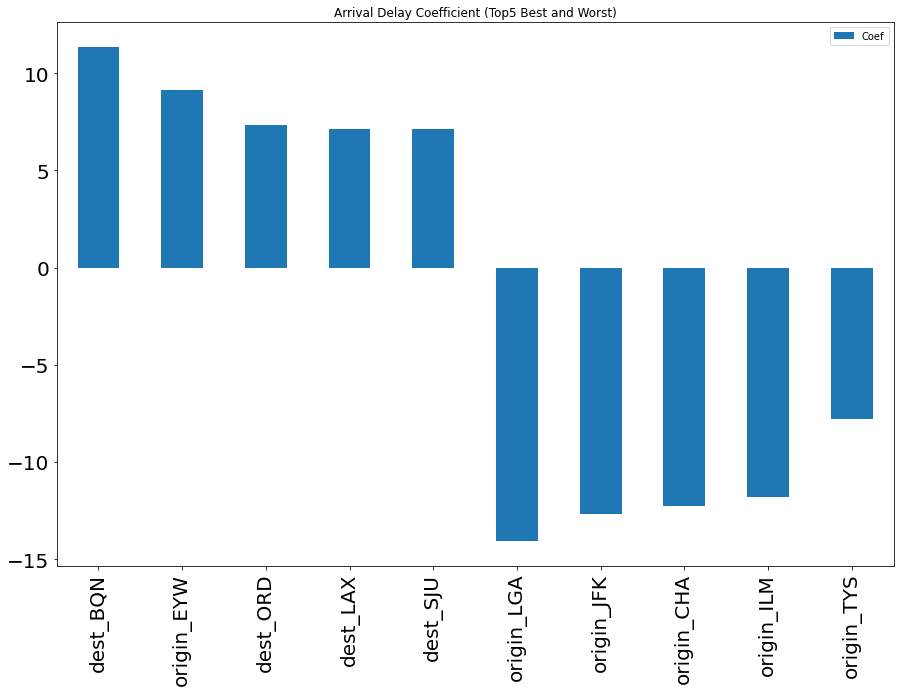

In [0]:
ax = AB.plot(kind='bar', title ="Arrival Delay Coefficient (Top5 Best and Worst)",figsize=(15,10),legend=True, fontsize=20)

# Departure Delay Regression and Result

In [0]:
df = pd.read_csv("dep_big_data.csv")

In [0]:
df

,distance,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,total_dep_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,479,0,0,0,0,0,0,0,51.00000,39.80000,27.20000,1033.90000,1010.50000,10.00000,8.60000,0.62000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1222,0,0,0,0,0,0,0,4.00000,62.60000,56.10000,1022.20000,1018.30000,6.90000,3.90000,0.00000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2381,0,0,0,0,0,0,0,19.00000,36.90000,14.80000,1017.00000,938.90000,10.00000,6.20000,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,594,0,0,0,0,0,0,0,88.00000,50.00000,22.10000,1019.80000,982.40000,10.00000,5.70000,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1080,0,0,0,0,0,0,0,48.00000,26.30000,8.60000,1024.60000,1023.60000,10.00000,6.10000,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177521,594,0,0,0,0,0,0,0,31.00000,42.20000,15.90000,1027.50000,989.30000,10.00000,5.30000,0.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177522,695,0,0,0,0,0,0,0,24.00000,29.40000,23.90000,1013.70000,977.00000,5.20000,11.00000,0.66000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177523,1182,0,0,0,0,0,0,0,8.00000,16.30000,3.70000,1026.00000,0.00000,10.00000,10.70000,0.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177524,1846,0,0,0,0,0,0,0,27.00000,50.20000,36.80000,1016.40000,15.90000,9.90000,12.70000,0.08000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = df.drop(['total_dep_delay'], axis = 1) 
y = df["total_dep_delay"]
# Test and Train data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_dep_delay   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     27.37
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        04:09:13   Log-Likelihood:            -6.6205e+05
No. Observations:              142020   AIC:                         1.325e+06
Df Residuals:                  141644   BIC:                         1.329e+06
Df Model:                         375                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.4316      1.007     22.268      0.000      20.457      24.406
distance                 0.0004      0.000      2.789      0.005       0.000       0.001
presidents_day           1.7042      0.578      2.946      0.003       0.570       2.838
easter                   0.0823      0.354      0.232      0.816      -0.612       0.776
memorial_day             0.6695      0.501      1.336      0.182      -0.313       1.652
independence_day        -3.8855      0.475     -8.183      0.000      -4.816      -2.955
labor_day               -0.9520      0.513     -1.856      0.064      -1.958       0.054
thanksgiving             0.8059      0.477      1.691      0.091      -0.128       1.740
winter_holiday           6.5835      0.475     13.864      0.000       5.653       7.514
temp                    -0.0559      0.009     -6.430      0.000      -0.073      -0.039
dew_point_temp           0.0023      0.003      0.912      0.362      -0.003       0.007
sea_level_pressure      -0.0009      0.001     -1.824      0.068      -0.002       7e-05
station_pressure      9.484e-05      0.000      0.354      0.723      -0.000       0.001
visibilty               -1.4545      0.067    -21.603      0.000      -1.586      -1.323
wind_speed               0.2561      0.025     10.426      0.000       0.208       0.304
prcp                    -0.0693      0.056     -1.241      0.215      -0.179       0.040
fog                      1.1290      0.315      3.582      0.000       0.511       1.747
rain_drizzle             1.6770      0.182      9.235      0.000       1.321       2.033
snow_ice_pellets         7.8045      0.357     21.868      0.000       7.105       8.504
hail                     1.0463      1.810      0.578      0.563      -2.501       4.594
thunder                  5.1136      0.269     19.011      0.000       4.586       5.641
tornado_funnel_cloud    -0.6225      4.946     -0.126      0.900     -10.317       9.072
month_1                  0.2966      0.253      1.171      0.242      -0.200       0.793
month_10                 0.0444      0.331      0.134      0.893      -0.604       0.692
month_11                -1.5013      0.295     -5.097      0.000      -2.079      -0.924
month_12                -2.4027      0.352     -6.833      0.000      -3.092      -1.713
month_2                 -0.3974      0.285     -1.395      0.163      -0.956       0.161
month_3                  0.7243      0.239      3.035      0.002       0.257       1.192
month_4                  1.1774      0.265      4.451      0.000       0.659       1.696
month_5                  2.4068      0.291      8.266      0.000       1.836       2.978
month_6                  7.0505      0.283     24.884      0.000       6.495       7.606
month_7                  8.3176      0.321     25.912    

In [0]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

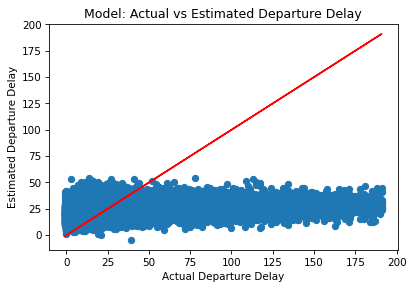

In [0]:
plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Departure Delay")
plt.ylabel("Estimated Departure Delay")
plt.title("Model: Actual vs Estimated Departure Delay")
plt.show()

In [0]:
print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE) : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_preds)))

Mean Absolute Error (MAE)         : 16.3176032402138
Mean Squared Error (MSE) : 690.5642545034777
Root Mean Squared Error (RMSE) : 26.27858927917322


In [0]:
LR = (results.summary2().tables[1]).astype(float)
LR.columns = ["Coef", "Std_err", "t", "P_value", "0.025", "0.975"]

In [0]:
C = LR.sort_values(['Coef'],ascending=False)

In [0]:
D = LR.sort_values(['Coef'],ascending=True)

In [0]:
C[C.P_value < 0.05].head(6)

,Coef,Std_err,t,P_value,0.025,0.975
dest_GJT,32.46315,12.85134,2.52605,0.01154,7.27476,57.65153
const,22.43157,1.00734,22.26812,0.00000,20.45721,24.40594
dest_ABE,16.81444,8.52674,1.97197,0.04862,0.10219,33.52669
origin_JFK,15.14856,0.77446,19.56005,0.00000,13.63063,16.66650
origin_LGA,14.89768,0.77209,19.29527,0.00000,13.38440,16.41096
dest_SFB,13.05263,3.67132,3.55530,0.00038,5.85692,20.24835


In [0]:
D[D.P_value < 0.05].head(5)

,Coef,Std_err,t,P_value,0.025,0.975
origin_ORH,-13.12285,4.42644,-2.96465,0.00303,-21.79859,-4.44712
origin_LBB,-8.09231,2.54937,-3.17424,0.00150,-13.08903,-3.09560
origin_BIL,-7.64674,2.77824,-2.75237,0.00592,-13.09204,-2.20145
origin_FNT,-7.64185,3.00386,-2.54401,0.01096,-13.52937,-1.75434
origin_ROC,-6.61992,1.79262,-3.69287,0.00022,-10.13343,-3.10641


In [0]:
C_6 = C[C.P_value < 0.05].head(6)
D_5 = D[D.P_value < 0.05].head(5)
C_Coef = C_6["Coef"]
D_Coef = D_5["Coef"]
CD = pd.concat([C_Coef, D_Coef])
CD = pd.DataFrame(CD)
CD

,Coef
dest_GJT,32.46315
const,22.43157
dest_ABE,16.81444
origin_JFK,15.14856
origin_LGA,14.89768
dest_SFB,13.05263
origin_ORH,-13.12285
origin_LBB,-8.09231
origin_BIL,-7.64674
origin_FNT,-7.64185


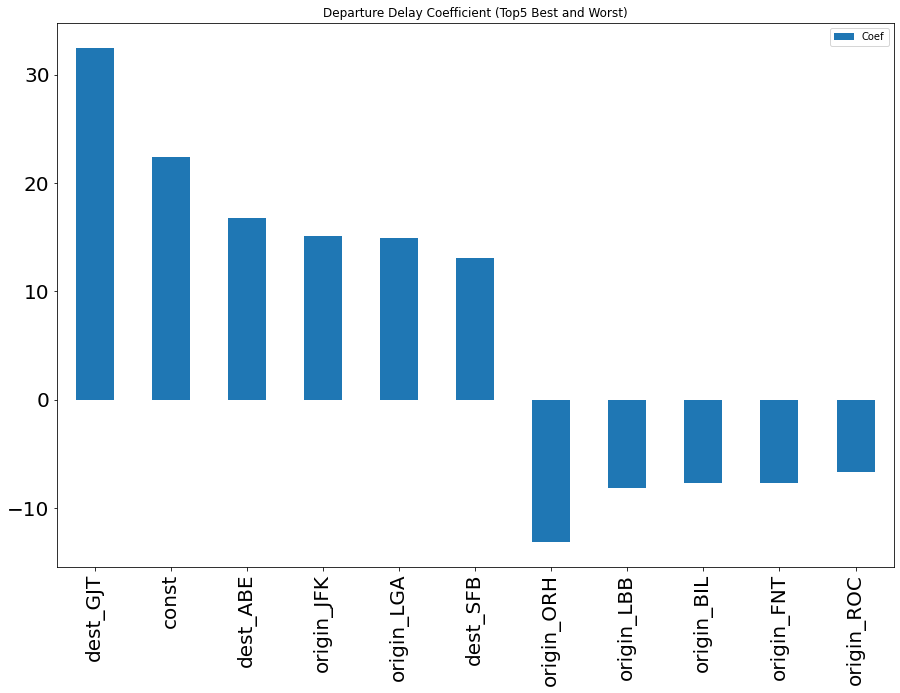

In [0]:
ax = CD.plot(kind='bar', title ="Departure Delay Coefficient (Top5 Best and Worst)",figsize=(15,10),legend=True, fontsize=20)